
# Lecture 16: Decision Trees

![](https://www.tensorflow.org/images/colab_logo_32px.png)
[Run in colab](https://colab.research.google.com/drive/1P9IoqXN9dbjJ3TN50wa8wwDdvn9P6hX7)

In [1]:
import datetime
now = datetime.datetime.now()
print("Last executed: " + now.strftime("%Y-%m-%d %H:%M:%S"))

Last executed: 2022-02-17 12:53:53


## Decision Trees

A class of machine learning algorithm that can perform both classification and regression

- Also a fundamental component of random forests (one of the most powerful ML algorithms available) 
- We will learn how to visualise and make predictions using Decision Trees  

Simple (in the first instance) conceptually as a *flow diagram* of decisions about the categories of a data set

## Example Decision Tree

Using the Iris Data set (see e.g. Lecture 3)

Each row corresponds to an observed (*sampled*) flower, with a number of *features*.

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier 

iris = load_iris() #loading data 
X = iris.data[:, 2:] # petal length and width 
y = iris.target #the answers 

#making a decision tree of depth 2 from the data 
tree_clf = DecisionTreeClassifier(max_depth = 2) #sets up the function 

tree_clf.fit(X, y); #performs the fit

In [3]:
#we want to visualise the actual flow diagram of the tree, for this we can use graphviz
from sklearn.tree import export_graphviz

export_graphviz(tree_clf, 
                out_file = './iris_tree.dot', 
                feature_names = iris.feature_names[ 2:], 
                class_names = iris.target_names, 
                rounded = True, 
                filled = True)

#creates a dot file :( so need to convert to something more sensible
! dot -Tpng ./iris_tree.dot -o ./iris_tree.png

To run dot locally you will need to install [graphviz](https://graphviz.org/).

You can install on Mac using Homebrew:
```bash
brew install graphviz
```

You can install on Ubuntu using apt:
```bash
sudo apt install graphviz
```

Installation instructions for other systems are available [here](https://graphviz.org/download/).

Results in ![](https://raw.githubusercontent.com/astro-informatics/course_mlbd_images/master/Lecture16_Images/iris_tree.png)

## Understanding the output

This is a 2D data with petal length and width.

Data is displayed in terms of *Nodes* and *Leafs*. 
- Top node is the _root node_ 
- Lower nodes are _leaf nodes_ 


![iris_tree_1node.png](https://raw.githubusercontent.com/astro-informatics/course_mlbd_images/master/Lecture16_Images/iris_tree_1node.png)

Arguments in the nodes are: 
- Top argument shows the _threshold_ upon which the classification division was made
- ```gini``` (see next slides) is the quantitative measure of the _threshold_
- ```samples```=number of training instances that satisfy the criteria 
- ```values```=number of training instances per class that satisfy the criteria 
- ```class```=prediction for the class 

## How do Decision Trees Work?

Threshold is found (using either gini or entropy measure). Then in the sub-set below threshold the process is repeated.

We set ```max_depth=2```, so algorithm stopped after two divisions. 

<img src="https://raw.githubusercontent.com/astro-informatics/course_mlbd_images/master/Lecture16_Images/DT_graph.png" alt="Drawing" style="width: 500px;"/>

## Threshold Measures 

Two commonly used metrics: Gini and Entropy. Also called _impurity_ or _purity_ measures.

### Gini 

$$
G_i=1-\sum_{k=1}^{n}p^2_{i,k}
$$

Where $p_{i,k}$ is the ratio of class k among training instances in the $i^{\rm th}$ node. 

$G_i=0$ means the sample is 100% _pure_ i.e. all instances are in a single class. $G_i=0.5$ would mean 50% are in the stated class.

### Entropy 

Alternative to Gini is to use entropy as the purity measure 
$
H_i=-\sum_{k=1}^n p_{i,k}\log(p_{i,k})
$
for $p_{i,k}\not=0$. 

Does it make a difference? Not usually, although Gini tends to isolate the most frequent classes, and entropy leads to more "balanced" trees.

In [4]:
#redo the first example but use entropy instead
tree_clf = DecisionTreeClassifier(max_depth = 2,criterion='entropy') #making a decision tree of depth 2 from the data 
tree_clf.fit(X, y)

export_graphviz(tree_clf, 
                out_file = './iris_tree_entropy.dot', 
                feature_names = iris.feature_names[ 2:], 
                class_names = iris.target_names, 
                rounded = True, 
                filled = True)
! dot -Tpng ./iris_tree_entropy.dot -o ./iris_tree_entropy.png

Entropy ![](https://raw.githubusercontent.com/astro-informatics/course_mlbd_images/master/Lecture16_Images/iris_tree_entropy.png)

Gini ![](https://raw.githubusercontent.com/astro-informatics/course_mlbd_images/master/Lecture16_Images/iris_tree.png)

### Classification And Regression Tree (CART) Algorithm

SciKit Learn uses the CART algorithm to do the thresholding. 

- Splits the sample into two subsets using a single feature $k$ at threshold $t_k$
- Chooses $k$ and $t_k$ by finding pair that produces purest subset

Cost function of the splits is 
$
J(k,t_k)=\frac{m_{\rm left}}{m}G_{\rm left}+\frac{m_{\rm right}}{m}G_{\rm right}
$
i.e. the number-weighted purity measure.

Note that CART 

- Only splits in two i.e. is binary 
- Is a greedy algorithm i.e. only considers level n optimisation not n+

## Class Probabilities 

Also want to know the _probability_ that an instance $i$ belongs to class $k$. 

Does this by finding the leaf node for instance $i$, then returns ratio of training instances of class $k$ in this node.


### Example 
For case where flower has petals=5cm long and 1.5cm wide
corresponding leaf node is at depth-2 left node. 

<img src="https://raw.githubusercontent.com/astro-informatics/course_mlbd_images/master/Lecture16_Images/DT_graph.png" alt="Drawing" style="width: 500px;"/>

![iris_tree_1node2.png](https://raw.githubusercontent.com/astro-informatics/course_mlbd_images/master/Lecture16_Images/iris_tree_1node2.png)

So probabilities are: 0% (Setosa), 49/54=90.7% (Versicolor), 5/54=9.3% (Virginica).

In [5]:
iris = load_iris() 
X = iris.data[:, 2:] # petal length and width 
y = iris.target #classifications 

tree_clf = DecisionTreeClassifier(max_depth = 2) #making a decision tree of depth 2 from the data 
tree_clf.fit(X, y) #do the fits

## for case where flower has petals=5cm long and 1.5cm wide
## corresponding leaf node is at depth-2 left node
# coordinates below are X coordinates 
tree_clf.predict_proba([[5, 1.5]])  

array([[0.        , 0.90740741, 0.09259259]])

## Further Optimisation 

Decision Trees are **non-parametric** classification algorithms. 

Tends to overfit if not careful. 

Need to regularise the problem. In Decision Trees this can be done by 
- Restricting the maximum depth of the tree ```max_depth``` in SciKit-Learn
- ```min_samples_split``` is mimimum number of samples before a node can be split 
- ```min_samples_leaf``` the minimum number a leaf can have (or ```min_weight_fraction``` expressed as a fraction of total samples)
- ```max_leaf_nodes``` maximum number of leaf nodes 
- ```max_features``` maximum number of features used in splitting a node

Other packages _prune_ i.e. make a (relatively) unrestricted tree then remove statistically insignificant nodes.

## Example

Use the make_moons data set SciKit Learn to make a Decision Trees based on: 
- 1) The default parameters 
- 2) When ```min_samples_leaf=4```
- 3) Plot the result and thresholds in a scatter plot

In [6]:
# Train two DTs on moons dataset.
# left: default params = no restrictions (case of overfitting)
# right: min_samples_leaf = 4. (better generalization)

from sklearn.datasets import make_moons
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

#create the data set X (features) and Y(classifications)
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53) 

#make two DTs one with min_samples_leaf
deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym);

In [7]:
def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris-Virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

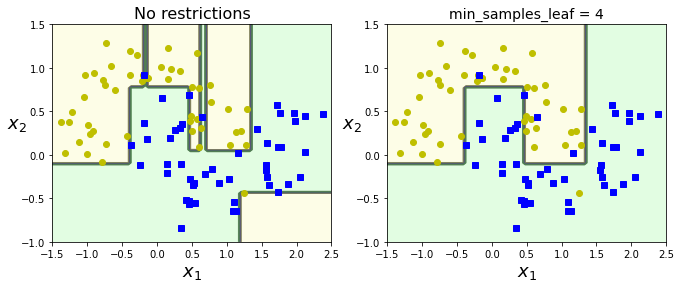

In [8]:
plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], iris=False)
plt.title("No restrictions", fontsize=16)
plt.subplot(122)
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], iris=False)
plt.title("min_samples_leaf = {}".format(deep_tree_clf2.min_samples_leaf), fontsize=14)

#save_fig("min_samples_leaf_plot")
plt.show()

## Decision Trees as Regression 

Can also use Decision Trees to do regression. 

In [9]:
from sklearn.tree import DecisionTreeRegressor #uses a different module from SciKit Learn

tree_reg=DecisionTreeRegressor(max_depth=2)
tree_reg.fit(X, y) #uses Iris data 

#this time trying to fin relation between X and y 

export_graphviz(tree_reg, 
                out_file = './iris_tree_reg.dot', 
                feature_names = iris.feature_names[ 2:], 
                class_names = iris.target_names, 
                rounded = True, 
                filled = True)
! dot -Tpng ./iris_tree_reg.dot -o ./iris_tree_reg.png
#tree in this case doesn't really help 

Entropy ![](https://raw.githubusercontent.com/astro-informatics/course_mlbd_images/master/Lecture16_Images/iris_tree_reg.png)

CART algorithm works in the same way except the cost function of the splits is 
$
J(k,t_k)=\frac{m_{\rm left}}{m}{\rm MSE}_{\rm left}+\frac{m_{\rm right}}{m}{\rm MSE}_{\rm right}
$
i.e. the number-weighted MSE measure.

In [10]:
#a more intuitive example 
from sklearn.tree import DecisionTreeRegressor
import numpy.random as rnd

# Quadratic training set + noise
rnd.seed(42)
m = 200
X = rnd.rand(m, 1) #random x
y = 4 * (X - 0.5) ** 2 #quadratic function
y = y + rnd.randn(m, 1) / 10 #random in y

tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y);

In [11]:
#plotting stuff

def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")


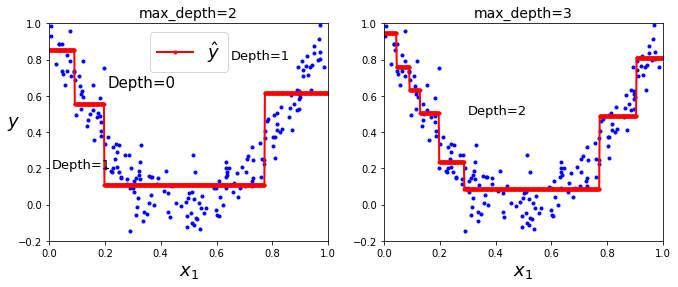

In [12]:
plt.figure(figsize=(11, 4)), plt.subplot(121), plot_regression_predictions(tree_reg1, X, y)
plt.text(0.21, 0.65, "Depth=0", fontsize=15), plt.text(0.01, 0.2, "Depth=1", fontsize=13)
plt.text(0.65, 0.8, "Depth=1", fontsize=13), plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=2", fontsize=14)

plt.subplot(122), plot_regression_predictions(tree_reg2, X, y, ylabel=None)
plt.text(0.3, 0.5, "Depth=2", fontsize=13), plt.title("max_depth=3", fontsize=14)
# Predicted value for each region (red line) = avg target value of instances in that region.
plt.show()

### Some Issues 

Decision Trees tend to make Orthogonal Boundaries (splits perpendicular to an axis). So sensitive to: 
- rotation of axis or transforms of variables
- training set selection. e.g. if one removes just one point from the Iris example get

<img src="https://raw.githubusercontent.com/astro-informatics/course_mlbd_images/master/Lecture16_Images/unstable.png" alt="Drawing" style="width: 300px;"/>
*Random Forests* get over some of these issues by averaging over many trees (see lectures on Performance Analysis and Ensemble RFs).

**Exercises:** *You can now complete Exercises 1-2 in the exercises associated with this lecture.*